In [1]:
import numpy as np
import pandas as pd
import collections

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [3]:
data=pd.read_csv('student_dataset.csv', names=["MODEL_ID", "PHOTO_ID", "0", "1", "2", "3",
"4", "GROUND_TRUTH"])
data.head()

,MODEL_ID,PHOTO_ID,0,1,2,3,4,GROUND_TRUTH
0,model_id_1,juhtlgtayx.jpg,0.0,0.0,0.0,0.5,0.5,4
1,model_id_1,ybysardiao.jpg,0.0,0.0,1.0,0.0,0.0,3
2,model_id_1,mpwobelagh.jpg,1.0,0.0,0.0,0.0,0.0,0
3,model_id_1,sflqkwznmf.jpg,0.0,0.0,0.0,1.0,0.0,3
4,model_id_1,oulwylryjo.jpg,0.0,0.0,1.0,0.0,0.0,2


В колонке GROUND_TRUTH - реальный класс данного фото. Только классы помечены как 0,1,2,3,4, а колонки CLASS_1_SCORE и так далее начинаются с 1. Переименовал столбцы с вероятностью соответстующего класса в названия классов, начиная с 0.

In [4]:
data['GROUND_TRUTH'] = data['GROUND_TRUTH'].astype(int)

model1 = data[:100000]
model2 = data[100000:200000]
model3 = data[200000:]
print(model1.shape, model2.shape, model3.shape)

(100000, 8) (100000, 8) (100000, 8)


Разбил датасет по моделям

In [5]:
model1Pred = model1[['0', '1', '2', '3', '4']].idxmax(axis=1).astype(int)
model2Pred = model2[['0', '1', '2', '3', '4']].idxmax(axis=1).astype(int)
model3Pred = model3[['0', '1', '2', '3', '4']].idxmax(axis=1).astype(int)
model1Pred.head()

0    3
1    2
2    0
3    3
4    2
dtype: int32

За предсказание модели беру класс, для которого была наибольшая вероятность.

In [6]:
np.unique(model1[['0', '1', '2', '3', '4']].values)

array([0. , 0.5, 1. ])

В модели 1 встречаются только вероятности 0, 0.5 и 1. Непонятно, какой ответ выбирать, когда модель дает 50% за один ответ и 50% за другой ответ.(Выбирал функцией idxmax(); она между 0.5 и 0.5 выбирала тот класс, что раньше встретился)

In [7]:
np.unique(model2[['0', '1', '2', '3', '4']].values)

array([1.0000e-05, 2.0000e-05, 3.0000e-05, ..., 9.9232e-01, 9.9282e-01,
       9.9782e-01])

В модели 2 уже видно, что она выдает различные вероятности(дробные числа) для разных классов. Логично предсказывать тот класс, для которого модель выдает наибольшую вероятность. 

In [8]:
np.unique(model3[['0', '1', '2', '3', '4']].values)

array([0., 1.])

Модель 3 выдает только вероятности 0 и 1. Здесь сразу понятно, что она предсказала.

In [9]:
print(collections.Counter((model1['GROUND_TRUTH'])))

Counter({4: 20151, 1: 20093, 3: 19969, 0: 19951, 2: 19836})


Для данного датасета accuracy является хорошей метрикой, потому что количество экземпляров в каждом классе примерно равное.

In [10]:
baseRate = 20151 / 100000
print(baseRate)

0.20151


Класс 4 - самый частый класс. Если предсказывать только этим классом, то точность примерно 20%

In [11]:
accuracy1 = accuracy_score(model1['GROUND_TRUTH'], model1Pred)
accuracy2 = accuracy_score(model2['GROUND_TRUTH'], model2Pred)
accuracy3 = accuracy_score(model3['GROUND_TRUTH'], model3Pred)
print(accuracy1, accuracy2, accuracy3)

0.53848 0.66607 0.59298


accuracy у второй модели лучше.

In [12]:
cr1 = classification_report(model1['GROUND_TRUTH'], model1Pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.68      0.89      0.77     19951
           1       0.45      0.52      0.49     20093
           2       0.40      0.42      0.41     19836
           3       0.43      0.40      0.42     19969
           4       0.84      0.45      0.59     20151

   micro avg       0.54      0.54      0.54    100000
   macro avg       0.56      0.54      0.53    100000
weighted avg       0.56      0.54      0.53    100000



In [13]:
cr2 = classification_report(model2['GROUND_TRUTH'], model2Pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80     19951
           1       0.59      0.59      0.59     20093
           2       0.66      0.38      0.48     19836
           3       0.65      0.54      0.59     19969
           4       0.73      0.85      0.78     20151

   micro avg       0.67      0.67      0.67    100000
   macro avg       0.66      0.67      0.65    100000
weighted avg       0.66      0.67      0.65    100000



In [14]:
cr3 = classification_report(model3['GROUND_TRUTH'], model3Pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     19951
           1       0.52      0.52      0.52     20093
           2       0.45      0.46      0.46     19836
           3       0.48      0.48      0.48     19969
           4       0.75      0.71      0.73     20151

   micro avg       0.59      0.59      0.59    100000
   macro avg       0.59      0.59      0.59    100000
weighted avg       0.60      0.59      0.59    100000



F-мера достигает максимума при precision и recall, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [15]:
f1_1 = f1_score(model1['GROUND_TRUTH'], model1Pred, average=None) 
f1_2 = f1_score(model2['GROUND_TRUTH'], model2Pred, average=None) 
f1_3 = f1_score(model3['GROUND_TRUTH'], model3Pred, average=None) 

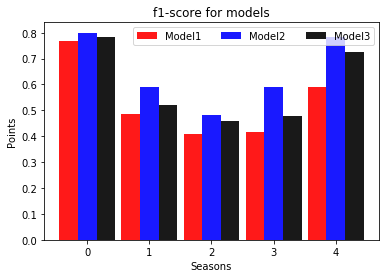

In [16]:
labels = ['0', '1', '2', '3', '4']

x = np.arange(len(labels))
width = 0.3 
opacity = 0.9

fig, ax = plt.subplots()

ax.bar(x, f1_1, width, alpha=opacity, color='r', label='Model1')
ax.bar(x+width, f1_2, width, alpha=opacity, color='b', label='Model2')
ax.bar(x+2*width, f1_3, width, alpha=opacity, color='k', label='Model3')

ax.set_xlabel('Seasons')
ax.set_ylabel('Points')
ax.set_title('f1-score for models')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend(ncol=3)
plt.show()


Для всех классов f1-score(F-мера) лучше у модели 2. На втором месте модель 3. Интуитивно понятно, что и среднее f1-score будет лучше у модели 2. Но все же вычислим средние.

In [17]:
f1_avg_1 = f1_score(model1['GROUND_TRUTH'], model1Pred, average='weighted') 
f1_avg_2 = f1_score(model2['GROUND_TRUTH'], model2Pred, average='weighted') 
f1_avg_3 = f1_score(model3['GROUND_TRUTH'], model3Pred, average='weighted') 
print(f1_avg_1, f1_avg_2, f1_avg_3)

0.5344264557959706 0.649483330902616 0.5939421798566817


f1-score выше у модели 2

## Итог:
Модель 2 дает лучший результат на данном датасете. Accuracy и f1-score выше, чем у других моделей.